In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('dados-abertos.csv', sep = ';')
df = pd.DataFrame(df)


Bad key "text.kerning_factor" on line 4 in
C:\Users\bcpython\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = df[df['Óbito'] == 'Sim'].reset_index(drop=True)
df['data'] = pd.to_datetime(df['Data Cadastro'], dayfirst = True)
df = df.reset_index(drop = True)

In [3]:
colunas = ['Data','Data Cadastro','Sexo','Faixa Etária','UF','Óbito','dataPrimeirosintomas','Pneumopatia','Nefropatia','Doença Hematológica','Distúrbios Metabólicos','Imunopressão','Obesidade','Outros','Cardiovasculopatia']
df.drop(columns = colunas,inplace=True)

In [4]:
df['qtd'] = 1
df = df.groupby('RA').agg('sum')
df = df.reset_index()

In [5]:
pop = pd.read_excel('populaçõesra.xlsx')
df_pop = pd.merge(df,pop,left_on='RA',right_on='ra')
df_pop = df_pop.drop(columns='ra')
df_pop['indice'] = (df_pop['qtd'] * 1000000) / df_pop['pop']
df_pop = df_pop.astype({'indice':int})

In [6]:
rpc = pd.read_excel('rpc.xlsx')
rpc = pd.DataFrame(rpc)
dff = pd.merge(df_pop,rpc,left_on='RA',right_on='ra').drop(columns='ra')

In [7]:
dff

,RA,qtd,pop,indice,rpc
0,Brazlândia,87,63414,1371,119
1,Candangolândia,28,16489,1698,1415
2,Ceilândia,754,437309,1724,1116
3,Cruzeiro,39,31079,1254,3755
4,Fercal,1,9365,106,813
5,Gama,286,142420,2008,1596
6,Guará,216,134255,1608,3642
7,Itapoã,24,62208,385,926
8,Jardim Botânico,18,55438,324,5862
9,Lago Norte,37,36987,1000,6362


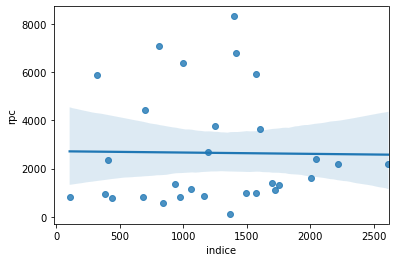

In [8]:
ax = sns.regplot(x='indice', y ='rpc', data = dff)

(0, 10000)

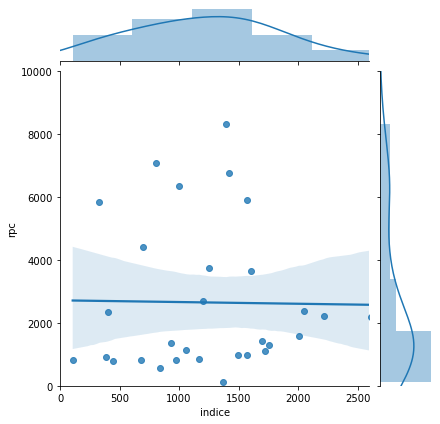

In [9]:
plot = sns.jointplot(x='indice', y='rpc', data = dff, kind='reg')
plot.ax_marg_x.set_xlim(0, 2600)
plot.ax_marg_y.set_ylim(0, 10000)

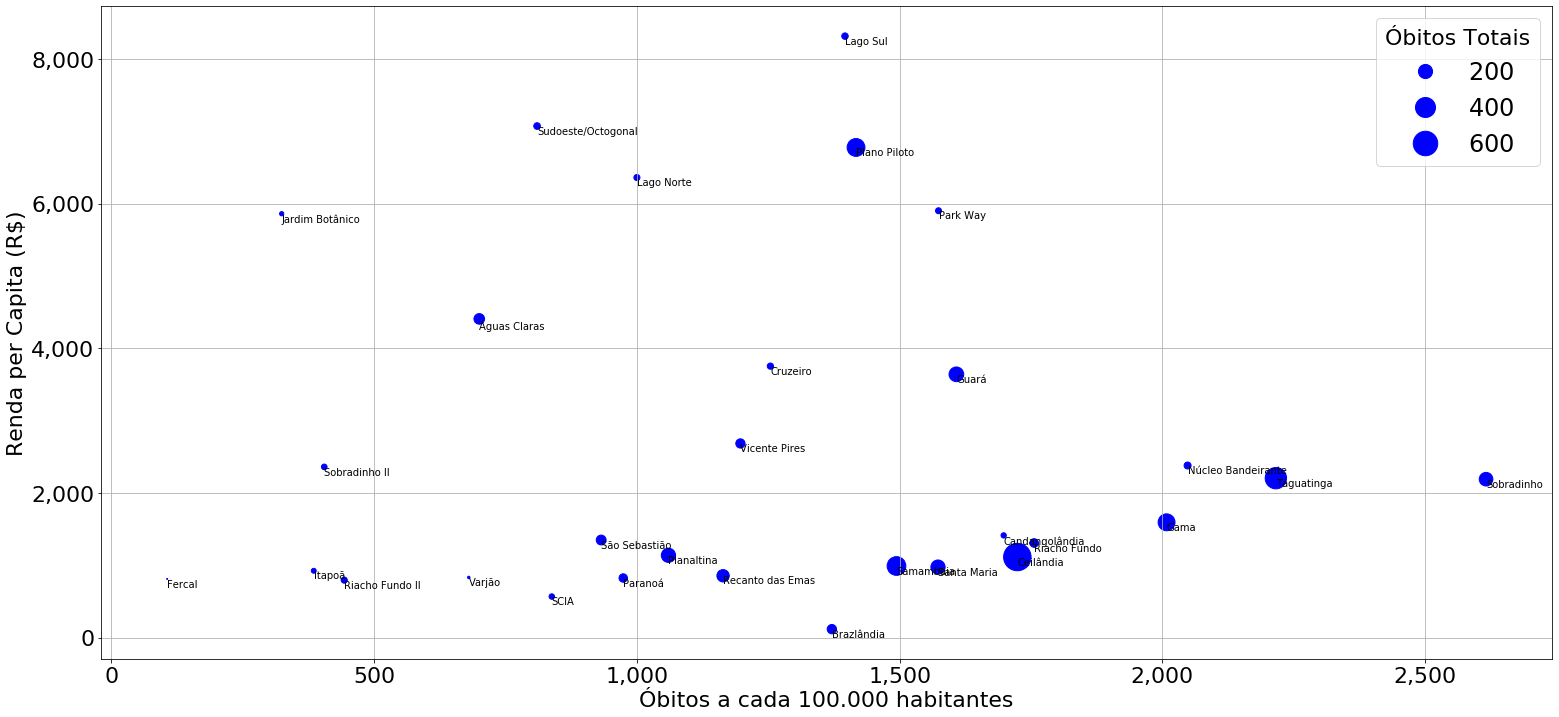

In [33]:
#falta: tentar botar rotulo nas bolinhas, tentar botar em reais eixo y e botar ponto no eixo x

from matplotlib.ticker import (FuncFormatter) 

fig, ax = plt.subplots(figsize=(26,12))
sct = plt.scatter(data=dff,x='indice',y='rpc',s='qtd',color='b')
plt.legend(*sct.legend_elements("sizes", num=4, color = 'b'), fontsize=24, title = 'Óbitos Totais', title_fontsize = 22)
plt.xlabel('Óbitos a cada 100.000 habitantes', fontsize=22)
plt.ylabel('Renda per Capita (R$)', fontsize=22)
ax.tick_params(labelsize=22)
plt.grid()
listaras = dff['RA']
for i, txt in enumerate(listaras):
    plt.annotate(txt, (dff['indice'][i],dff['rpc'][i]),
                horizontalalignment='left',
                verticalalignment='top',
                fontsize='10',
                clip_on = True)
ax.get_xaxis().set_major_formatter(
    FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()